In [6]:
import Pkg; Pkg.activate("/Users/driscoll/Dropbox/class/428")
Pkg.instantiate()
using FNCFunctions
using CairoMakie

  Activating project at `~/Dropbox/class/428`


## 1
Using the function `parabolic` from the text, solve the Fisher equation over $0 \le x \le 6$, $0 \le t \le 8$, with $k^2=0.5$, the initial condition

$$
u(x,0) = e^{-2(x-3)^2},
$$

a homogeneous Neumann condition at $x=0$, and a homogeneous Dirichlet condition at $x=6$. Use a grid size of $m=80$ in space. Make an animation of the solution.

In [7]:
ϕ = (t, x, u, uₓ, uₓₓ) -> 0.5uₓₓ + u - u^2
g₁ = (u, uₓ) -> uₓ
g₂ = (u, uₓ) -> u;

In [8]:
init = x -> (1+cos(π*x/2)) / 2
init = x -> exp(-2*(x - 3)^2)
x, u = FNC.parabolic(ϕ, (0, 6), 80, g₁, g₂, (0, 8), init);

In [9]:
time = Observable(0.)
soln = @lift(u($time))
fig, ax, _ = lines(x, soln, linewidth=3)
record(fig, "fisher.mp4", range(0, 8, 100)) do t
    time[] = t
    fig
end

"fisher.mp4"

<video width="320" height="240" controls>
  <source src="fisher.mp4" type="video/mp4">
</video>

## 2

Make a plot of $u(0,t)$ for $0 \le t \le 8$. Since $x=0$ is a node in the discretization, this is straightforward. 

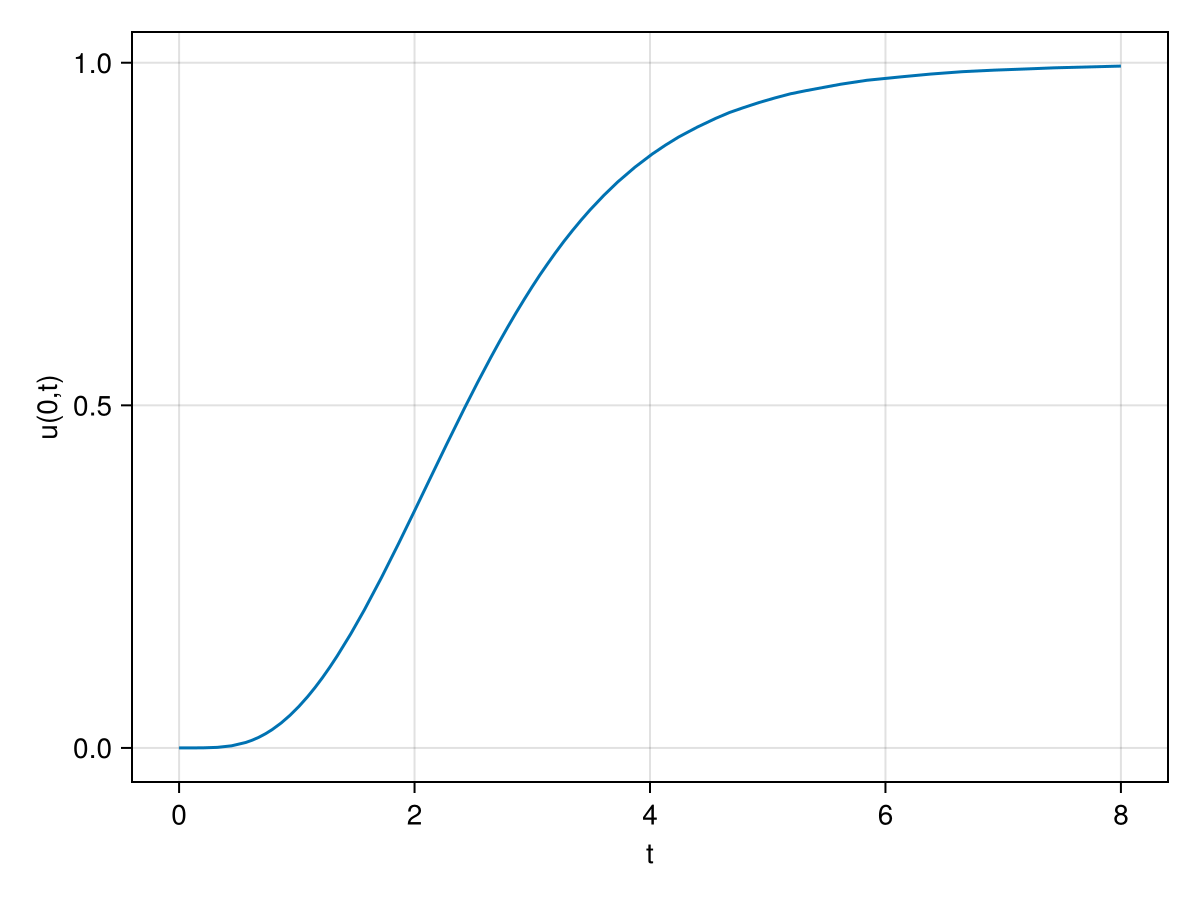

In [10]:
fig, ax, _ = lines(0..8, t -> u(t)[1])
ax.xlabel = "t"
ax.ylabel = "u(0,t)"
fig

## 3

Use the numerical solution and a scalar rootfinding method (such as `secant` from the textbook) to find the time $t_0$ when $u(0,t_0)=0.5$. 

In [20]:
FNC.secant(t -> u(t)[1] - 0.5, 1, 3)

8-element Vector{Float64}:
 1.0
 3.0
 2.4373100069472935
 2.436152258063373
 2.436272977350799
 2.436272999192997
 2.4362729991925525
 2.4362729991925525

In [23]:
u(0)[41]

1.0

## 4 

Make a plot of $u(4,t)$ for $0 \le t \le 8$. Since $x=4$ is not a node in the discretization, you will need to use (Chebyshev) polynomial interpolation to find the value at $x=4$ of the solution vector returned for a given time $t$. Also print out the numerical values of $u(4,t)$ for $t=2,4,6,8$. 

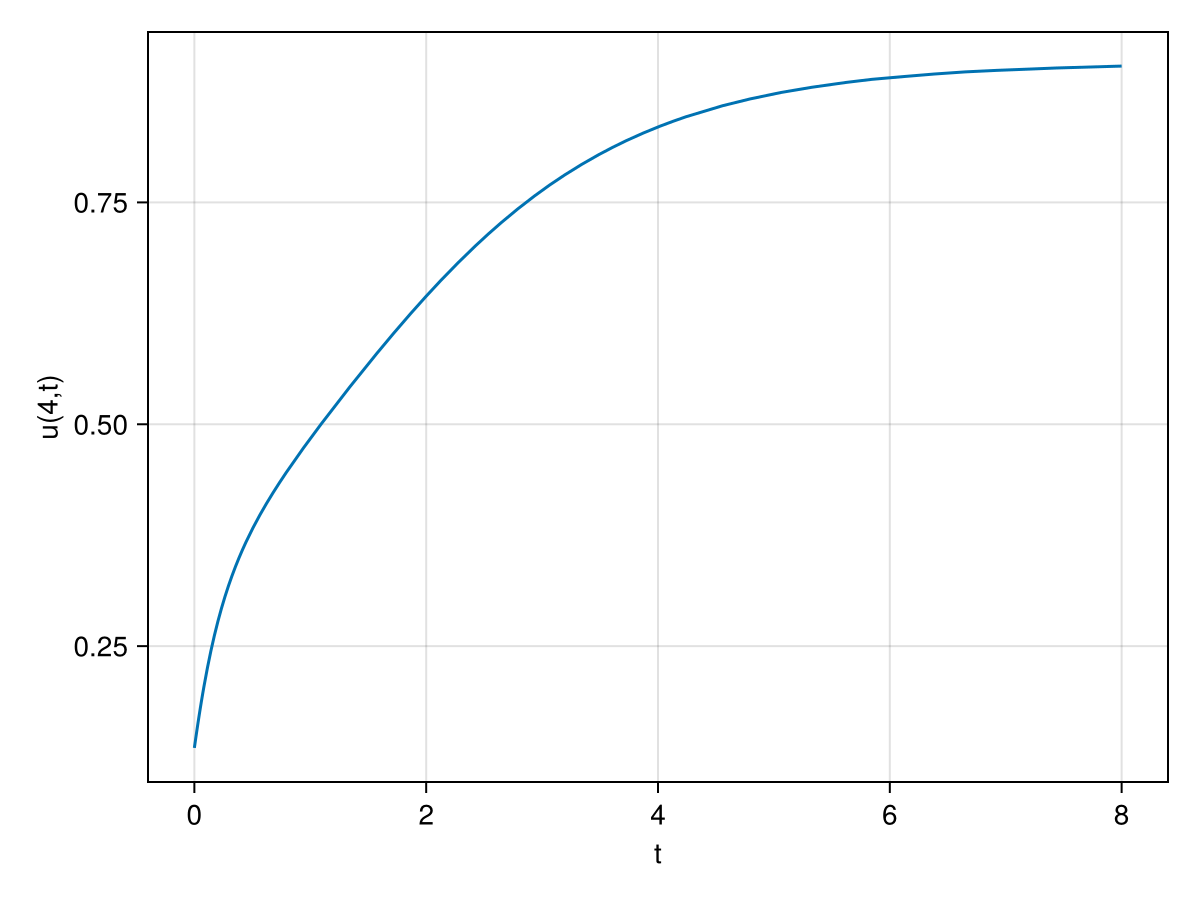

In [12]:
u4 = t -> FNC.polyinterp(x, u(t))(4)
fig, ax, _ = lines(0..8, u4)
ax.xlabel = "t"
ax.ylabel = "u(4,t)"
fig

In [13]:
for t in 2:2:8
    println((t, u4(t)))
end

(2, 0.6443055467002676)
(4, 0.8350259749172492)
(6, 0.8904880909026153)
(8, 0.90359265920238)


## 5

Solve the steady BVP with the same domain and boundary conditions using the function `bvp` from the text. Since this function uses less-accurate finite differences rather than a Chebyshev discretization, solve with $m=800$. 

In [19]:
ψ = (x, u, uₓ) -> 2 * (u^2 - u)
g₁ = (u, uₓ) -> uₓ
g₂ = (u, uₓ) -> u
x̂ = collect(range(0, 6, 800))
init = FNC.polyinterp(x, u(6)).(x̂)
_, û = FNC.bvp(ψ, (0, 6), g₁, g₂, init);

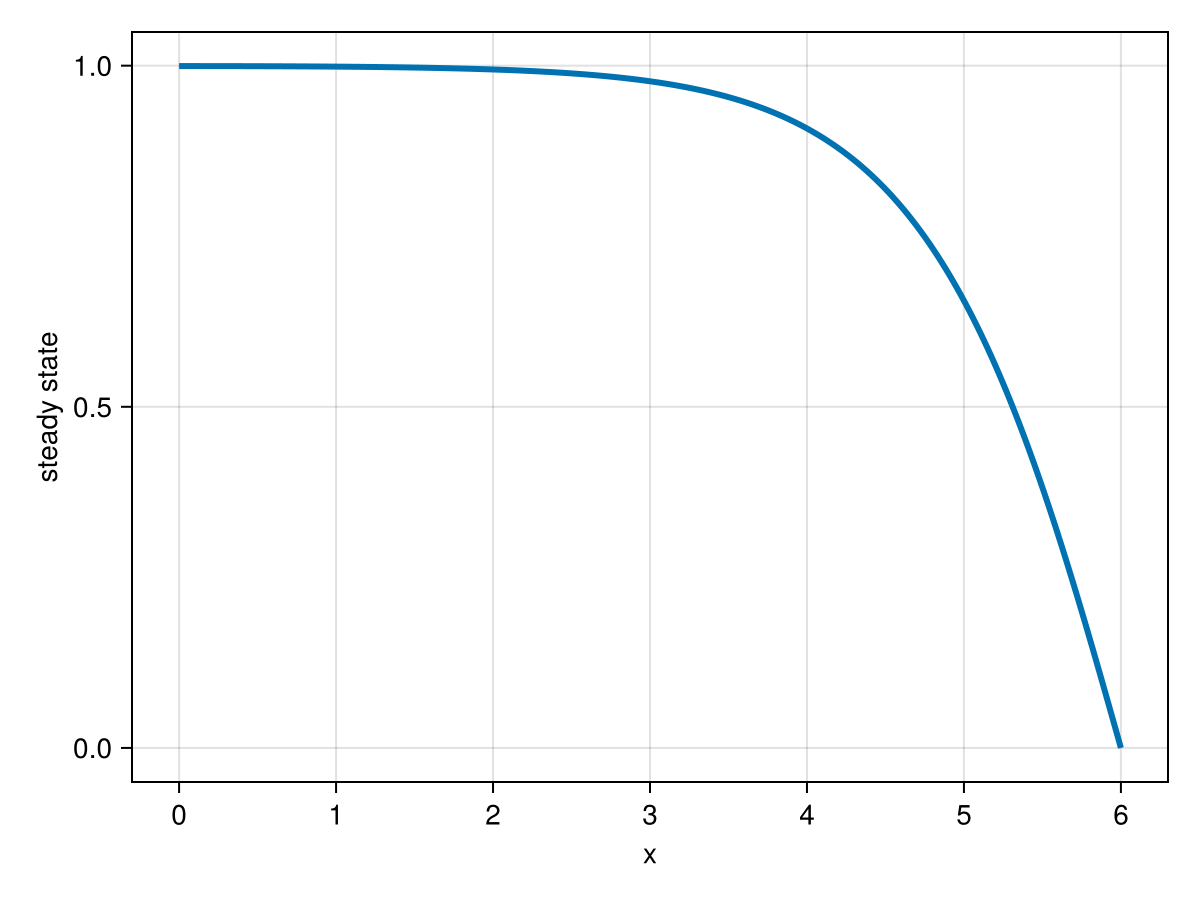

In [17]:
lines(x̂, û, linewidth=3, axis=(xlabel="x", ylabel="steady state"))

## 6 

Plot the difference as a function of $x$ between the steady-state solution and the PDE solution at $t=8$. You will again need to use Chebyshev interpolation to put the numerical solutions on the same grid.

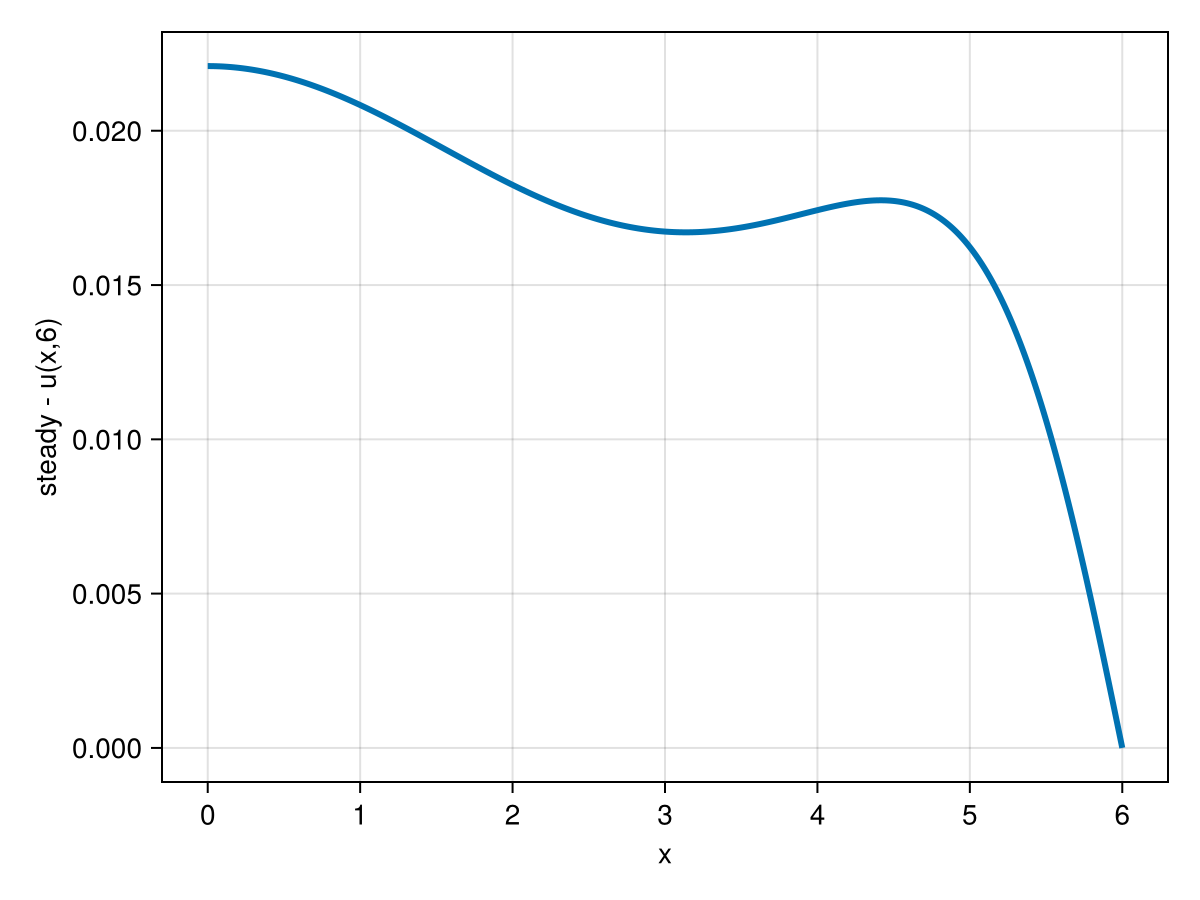

In [16]:
lines(x̂, û - FNC.polyinterp(x, u(6)).(x̂), axis=(xlabel="x", ylabel="steady - u(x,6)"), linewidth=3)